<a href="https://colab.research.google.com/github/almirars/PCVK_ALMIRA/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


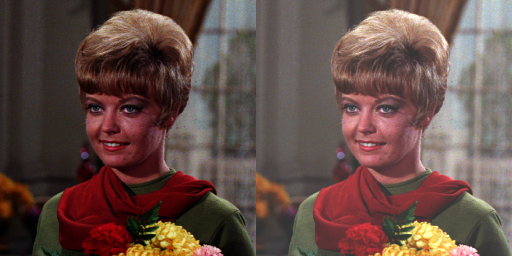

In [14]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa loop
#brightness_image = cv.convertScaleAbs(original, berta+brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Mengubah kontras dan tingkat kecerahan citra
--------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 60
Masukkan kontras [1.0 - 3.0]: 1.5


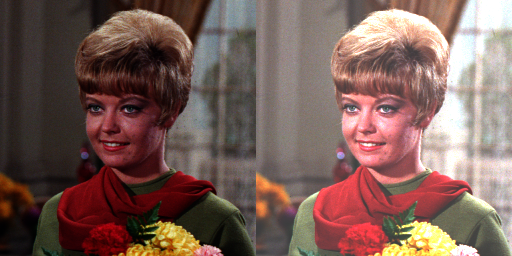

In [28]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
except ValueError:
  print('Error, not a number')

try:
  contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
contrast_img = np.zeros(original.shape, original.dtype)

# contrast
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_img[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)

#cara simple tanpa loop
#brightness_image = cv.convertScaleAbs(original, berta+brightness)

final_frame = cv.hconcat((original, contrast_img))
cv2_imshow(final_frame)

Average



Averaging


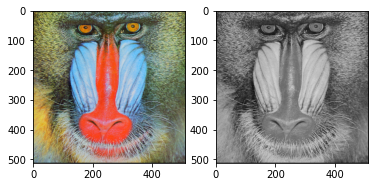

In [32]:
ori_img = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
ori_rgb = cv.cvtColor(ori_img, cv.COLOR_BGR2RGB)
ori_img[:] = ori_img.mean(axis = -1, keepdims = 1)
fig, ax = plt.subplots(1,2)
print('Averaging')
ax[0].imshow(ori_rgb)
ax[1].imshow(ori_img)

Lightness

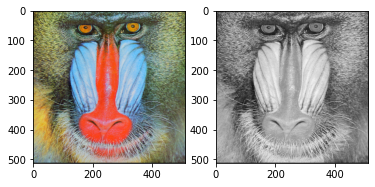

In [40]:
ori_img2 = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
ori_rgb2 = cv.cvtColor(ori_img2, cv.COLOR_BGR2RGB)
R, G, B = ori_img2[:,:,0], ori_img2[:,:,1], ori_img2[:,:,2]
max_channel = np.maximum(np.maximum(R, G), B)
min_channel = np.minimum(np.minimum(R, G), B)

gray_img = max_channel/2 + min_channel/2

f, axarr = plt.subplots(1,2)
axarr[0].imshow(ori_rgb2)
axarr[1].imshow(gray_img, cmap='gray')

Luminance

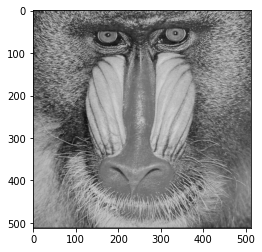

In [51]:
ori_img3 = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
ori_rgb3 = cv.cvtColor(ori_img3, cv.COLOR_BGR2RGB)
W = [0.2,0.5,0.3] 
W_mean = np.tensordot(ori_img3,W, axes=((-1,-1)))[...,None]
ori_img3[:] = W_mean.astype(ori_img3.dtype)
plt.imshow(ori_img3)

Warna Tertentu

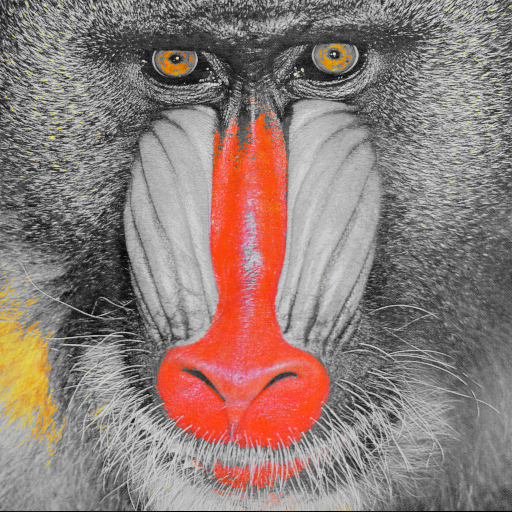

In [52]:
ori_img4 = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
ori_rgb4 = cv.cvtColor(ori_img3, cv.COLOR_BGR2RGB)
ret, mask = cv.threshold(ori_img4[:, :,2], 200, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(ori_img4)
mask3[:, :, 0] = mask
mask3[:, :, 1] = mask
mask3[:, :, 2] = mask

red = cv.bitwise_and(ori_img4, mask3)
gray = cv.cvtColor(ori_img4, cv.COLOR_BGR2GRAY)
ori_img4  = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(ori_img4, 255 - mask3)

out = gray + red
cv2_imshow(out)